All questions in this homework will be graded manually. 

In [16]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as scs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn import tree

## Q1 (1 pt)

Consider the data in the file 'heart.csv'. The column 'target' corresponds to the class label. 
Use the train_test_split() function in sklearn to randomly split the dataset into 70% training set and 30% test set, by setting test_size=0.30, shuffle=True, and  rnd_state=42 in the train_test_split() function. 

Fix the train and test sets obtained using this setting. You will use the same test set for calculating the accuracy in the following questions. 

In [17]:
# get_train_test_split(filename) takes as input 
# the filename to read in data from, the sample size, test set size and random state.
# Returns the train and test splits obtained from the sampled data with the provided random state. 



def get_train_test_split(filename, rnd_state):
    
    ###
    ### YOUR CODE HERE
    ###
    test_proportion = 0.3
    df=pd.read_csv(filename)
    y=df.target
    X=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_proportion,shuffle=True,random_state=rnd_state)
    return  X_train, X_test, y_train, y_test
# For example,
get_train_test_split('heart.csv',42)
# -> (X_train, X_test, y_train, y_test)


(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 124   39    0   2        94   199    0        1      179      0      0.0   
 72    29    1   1       130   204    0        0      202      0      0.0   
 15    50    0   2       120   219    0        1      158      0      1.6   
 10    54    1   0       140   239    0        1      160      0      1.2   
 163   38    1   2       138   175    0        1      173      0      0.0   
 155   58    0   0       130   197    0        1      131      0      0.6   
 97    52    1   0       108   233    1        1      147      0      0.1   
 68    44    1   1       120   220    0        1      170      0      0.0   
 229   64    1   2       125   309    0        1      131      1      1.8   
 37    54    1   2       150   232    0        0      165      0      1.6   
 16    58    0   2       120   340    0        1      172      0      0.0   
 126   47    1   0       112   204    0        1      143      0      0.1   

Run the following cell to initialize the train and test splits. 

In [18]:
X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',42)

## Q2 (2 pts)

Now, write a method that takes the train and test datasets obtained above, and fits the specified model type using the training data. The model_type argument can be either 'NBC' (Naive Bayes Classifier), 'P' (Perceptron), 'DT' (Decision Tree). 
For NBC, use MultinomialNB() function in sklearn. 
For P, use Perceptron(tol=1e-3) in sklearn. 
For DT, use DecisionTreeClassifier() in sklearn.

Using the learned model, return the accuracy on the test data. 

In [19]:
# get_accuracy(X_train, X_test, y_train, y_test, model_type) takes as input 
# the training and test splits: X_train, X_test, y_train, y_test, and
# the model type ('NBC' or 'P' or 'DT')
# Returns the accuracy on the test split by training the given model type on train splits. 
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
def get_accuracy(X_train, X_test, y_train, y_test, model_type):
    
    ###
    ### YOUR CODE HERE
    ###
    if(model_type=="P"):
        model = Perceptron(tol=1e-3).fit(X_train, y_train)
    if(model_type=="NBC"):
        model =GaussianNB().fit(X_train, y_train) # use default parameters
    if(model_type=="DT"):
        model = tree.DecisionTreeClassifier().fit(X_train, y_train)
   
    return model.score(X_test,y_test)
    
# For example,
print(get_accuracy(X_train, X_test, y_train, y_test, 'NBC'))
# varies around -> 0.7912087912087912

print(get_accuracy(X_train, X_test, y_train, y_test, 'P'))
# varies around -> 0.7362637362637363

print(get_accuracy(X_train, X_test, y_train, y_test, 'DT'))
# varies around -> 0.7252747252747253

0.8351648351648352
0.7362637362637363
0.7362637362637363


## Q3 (2 pts)

Use the train and test datasets obtained from the get_train_test_split() function in Q1. Given a list of proportions, sample (without replacement) different proportions of the training data. For each sample, fit the specified model_type. 

Then apply the model to the data indicated by the data_type argument and record accuracy. When data_type='train' apply the model to the sampled training data, when data_type='test' apply the model to the full test set (i.e., do not sample the test set), when data_type='both' apply the model to both the training set and the test set. 

Return a dictionary that maps the sample size (key) used to fit the model to the corresponding accuracy on the specified data_type (value). Note when data_type='both', store the training and test accuracies as a tuple. 

For generating the samples, you can use np.random.choice().

In [20]:
# get_learning_curve(filename, rnd_state, proportions, model_type, data_type) takes as input 
# the filename to read in data from, the random state, a list of proportions, 
# the model type ('NBC' or 'P' or 'DT'), and the data type ('train' or 'test' or 'both').
# Returns a dictionary with key as the size of the sample used to fit the model,
# and value as the corresponding accuracy (a floating point value for data_type = 'train' or 'test', and 
# a tuple of accuracies for data_type='both') on the specified data. 

def get_learning_curve(filename, rnd_state, proportions, model_type, data_type):
    ###
    ### YOUR CODE HERE
    ###
    result={}
    for i in proportions:
       
        X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',42)
        l=(len(X_train))
       
        X_train=X_train.sample(frac=i,replace=True)
        y_train=y_train.sample(frac=i,replace=True)
        if(model_type=="P"):
                model = Perceptron(tol=1e-3).fit(X_train, y_train)
        if(model_type=="NBC"):
                model =GaussianNB().fit(X_train, y_train) # use default parameters
        if(model_type=="DT"):
                model = tree.DecisionTreeClassifier().fit(X_train, y_train)
        if data_type=='both':      
            result[int(i*l)]= model.score(X_train,y_train), model.score(X_test,y_test)
        if data_type=='train':      
            result[int(i*l)]=  model.score(X_train,y_train)
        if data_type=='test':      
            result[int(i*l)]= model.score(X_test,y_test)
    return result
# For example,
get_learning_curve('heart.csv', 42, [0.1, 0.3, 0.5, 0.7, 0.9], 'NBC', 'both')
# -> Dictionary
# 21: (..., ...),
# 63: (..., ...),
# 106: (..., ...),
# 148: (..., ...),
# 190: (..., ...)}


{21: (0.6190476190476191, 0.38461538461538464),
 63: (0.6875, 0.5824175824175825),
 106: (0.5943396226415094, 0.5824175824175825),
 148: (0.5608108108108109, 0.3626373626373626),
 190: (0.5706806282722513, 0.27472527472527475)}

## Q4 (2 pt)

Write a function that calculates the average accuracy and standard error over a given number of trials. For each trial, call get_train_test_split() as in Q1 to generate a new train/test split, then call get_learning_curve() with the specified proportions. Set the 'random_state' parameter to trial number to faciliate testing, i.e., for the first trial use random_state=0, for the second sample use random_state=1, etc.

Return a dictionary with key as the size of the sample used to fit the model, and the value as a tuple whose first element is the average accuracy, and second element is the standard error. Note, when data_type='both' the value should be a tuple with the avg/stderr for the training and test data.

In [21]:
# get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type) takes as input 
# the filename to read in data from, the random state, the model type ('NBC' or 'P' or 'DT'), 
# a list of proportions, the number of trials, 
# and the type of data to calculate accuracy on ('train' or 'test' or 'both').
# Returns a dictionary with key as the size of the sample used to fit the model, and the value as a tuple with:
# the first element as the average accuracy, and the second element as the standard error. 
# Note, when data_type='both' the value should be a tuple with the average accuracy and standard error
# for both the training and test data.

def get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type):    
    ###
    ### YOUR CODE HERE
    ###
    totalTr=0
    totalTe=0
    temp={}
    for i in proportions:
         
            for j in range(num_trials):
                    result={}
                    X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',j)
                    l=(len(X_train))
                    X_train=X_train.sample(frac=i,replace=True)
                    y_train=y_train.sample(frac=i,replace=True)
                    
                    if(model_type=="P"):
                            model = Perceptron(tol=1e-3).fit(X_train, y_train)
                    if(model_type=="NBC"):
                            model =GaussianNB().fit(X_train, y_train) # use default parameters
                    if(model_type=="DT"):
                            model = tree.DecisionTreeClassifier().fit(X_train, y_train)
                    if data_type=='both':      
                        result[int(i*l)]= model.score(X_train,y_train), model.score(X_test,y_test)
                        totalTr+=result[int(i*l)][0] 
                        totalTe+=result[int(i*l)][1] 
                    if data_type=='train':      
                        result[int(i*l)]=  model.score(X_train,y_train)
                        totalTr+=result[int(i*l)] 
                    if data_type=='test':      
                        result[int(i*l)]= model.score(X_test,y_test) 
                        totalTe+=result[int(i*l)]
            if data_type=='test':
               temp[int(i*l)]=totalTe/num_trials
            if data_type=='train':
                temp[int(i*l)]=totalTr/num_trials
            if data_type=='both':
                temp[int(i*l)]=totalTe/num_trials,totalTr/num_trials
   
    return temp      
    
# For example,
get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.3, 0.5, 0.7, 0.9], 10, 'train')
# -> Dictionary


{21: 0.8047619047619048,
 63: 1.4985119047619047,
 106: 2.1513420934411496,
 148: 2.7858015529006095,
 190: 3.392607835623123}

## Q5 (5 pts)

(a) Consider the following proportions: [0.1, 0.2, 0.4, 0.6, 0.8]. Plot the learning curve for NBC showing the average accuracy and the standard error for 10 trials as a function of training set sample size. 

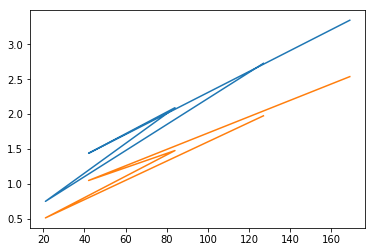

In [22]:
###
### YOUR CODE HERE
###
x=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').keys()
y=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').values()
plt.plot(x,y)
x=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(x,y)
plt.show()

(b) Plot the same learning curve as Q5a, but for Perceptron.

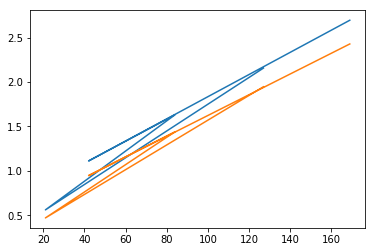

In [23]:
###
### YOUR CODE HERE
###
x=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').keys()
y=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').values()
plt.plot(x,y)

x=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(x,y)
plt.show()


(c) Plot the same learning curve as Q5a, but for Decision Tree Classifier.

{169: 4.577457376651447, 42: 1.9023809523809525, 84: 2.8317927170868353, 21: 0.961904761904762, 127: 3.7262809060632116}


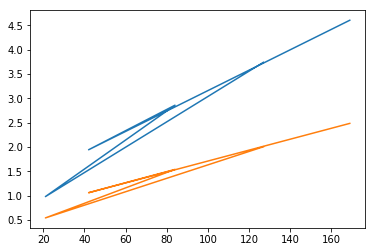

In [24]:
###
### YOUR CODE HERE
###
print(get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train'))
x=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').keys()
y=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'train').values()
plt.plot(x,y)

x=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(x,y)
plt.show()

(d) Based on the learning curves obtained in (5a), (5b), and (5c), state which of three models overfits the training data. Justify your answer.

In [25]:
Decision Tree has the highest training accuaracy with the lowest testing accuarcy. As more sample is added the disparity
in trainign and testing accuracy aslo increases. Thus, it has a higher chance of overfitting.

SyntaxError: invalid syntax (<ipython-input-25-dc214273e492>, line 1)

### YOUR ANSWER HERE: 

(e) Create a single learning curve plot comparing the accuracies of the three models on the test set for training set proportions [0.1, 0.2, 0.4, 0.6, 0.8].

In [ ]:
###
### YOUR CODE HERE
###

x=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'DT', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(list(x),list(y))
plt.legend(['DT'])
x=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'P', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(list(x),list(y))
plt.legend(['P'])
x=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').keys()
y=get_average_accuracy('heart.csv', 42,'NBC', [0.1, 0.2, 0.4, 0.6, 0.8], 10, 'test').values()
plt.plot(list(x),list(y))
plt.legend(['NBC'])
plt.legend(["DT", "P", "NBC"], loc=1)
plt.show()

## Q6 (2 pts)

(a) Given the results in Q5e, choose one training set size (e.g., 50) and formulate a hypothesis about the observed performance difference between any two of the models (NBC/P/DT).

In [ ]:
They all have simillar accuaracy levels along sample size. As sample size increases, accuracy increases.

### State your hypothesis here: 

(b) Test your hypothesis using a paired t-test with significance level alpha = 0.05. Print out the resulting pvalue and your accept/rejct decision.

Note: you need to test the hypothesis using the results from each random trial rather than the average results returned by get_average_accuracy().

In [ ]:
###
### YOUR CODE HERE
###
# Run this cell so that the necessary packages are imported. 
import scipy.stats as st 
np.random.seed(0) # fix the seed of the random number generator to simplify testing.
def get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type):    
    ###
    ### YOUR CODE HERE
    ###
    totalTr=0
    totalTe=0
    result=[]
    for i in proportions:
            test_proportion =i
            for j in range(num_trials):
                   
                    X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',j)
                    l=(len(X_train))
                    X_train=X_train.sample(frac=i,replace=True)
                    y_train=y_train.sample(frac=i,replace=True)
                    
                    if(model_type=="P"):
                            model = Perceptron(tol=1e-3).fit(X_train, y_train)
                    if(model_type=="NBC"):
                            model =GaussianNB().fit(X_train, y_train) # use default parameters
                    if(model_type=="DT"):
                            model = tree.DecisionTreeClassifier().fit(X_train, y_train)
                    if data_type=='both':      
                        result.append(model.score(X_train,y_train), model.score(X_test,y_test))
                        
                    if data_type=='train':      
                        result.append(model.score(X_test,y_test)) 
                     
                    if data_type=='test':      
                        result.append(model.score(X_test,y_test)) 
    return result                    
 
def two_sample_paired_t_test(alpha):
    ###
    ### YOUR CODE HERE
    ###
    
    d1 = (get_average_accuracy('heart.csv', 42,'DT',
                     [0.23], 10, 'train'))

    d2 = (get_average_accuracy('heart.csv', 42,'NBC',
                     [0.23], 10, 'train'))
    print(d1,d2)
    t,x = st.ttest_ind(d1, d2) 
    t,p = st.ttest_rel(d1, d2) 
    if (x>=alpha):
        a='accept'
    else:
        a='reject'
    if (p>=alpha):
        r='accept'
    else:
        r='reject'
    return p,r
    
# For example,
print(two_sample_paired_t_test(0.05))

(c) Now, test the hypothesis that you made in Q6a over all training set sizes. Note: Since you consider multiple sample sizes, you need to apply Bonferroni correction for testing the hypothesis. 

Print out the pvalue and accept/decision for each sample size. 

In [ ]:
###
### YOUR CODE HERE
###
# Run this cell so that the necessary packages are imported. 
import scipy.stats as st 
np.random.seed(0) # fix the seed of the random number generator to simplify testing.
def get_average_accuracy(filename, rnd_state, model_type, proportions, num_trials, data_type):    
    ###
    ### YOUR CODE HERE
    ###
    totalTr=0
    totalTe=0
    result=[]
    for i in proportions:
            test_proportion =i
            for j in range(num_trials):
                   
                    X_train, X_test, y_train, y_test = get_train_test_split('heart.csv',j)
                    l=(len(X_train))
                    X_train=X_train.sample(frac=i,replace=True)
                    y_train=y_train.sample(frac=i,replace=True)
                    
                    if(model_type=="P"):
                            model = Perceptron(tol=1e-3).fit(X_train, y_train)
                    if(model_type=="NBC"):
                            model =GaussianNB().fit(X_train, y_train) # use default parameters
                    if(model_type=="DT"):
                            model = tree.DecisionTreeClassifier().fit(X_train, y_train)
                    if data_type=='both':      
                        result.append(model.score(X_train,y_train), model.score(X_test,y_test))
                        
                    if data_type=='train':      
                        result.append(model.score(X_test,y_test)) 
                     
                    if data_type=='test':      
                        result.append(model.score(X_test,y_test)) 
    return result                    
 
def two_sample_paired_t_test(alpha):
    ###
    ### YOUR CODE HERE
    ###
    
    d1 = (get_average_accuracy('heart.csv', 42,'DT',
                     [1], 10, 'train'))

    d2 = (get_average_accuracy('heart.csv', 42,'NBC',
                     [1], 10, 'train'))
    print(d1,d2)
    t,x = st.ttest_ind(d1, d2) 
    t,p = st.ttest_rel(d1, d2) 
    if (x>=alpha):
        a='accept'
    else:
        a='reject'
    if (p>=alpha):
        r='accept'
    else:
        r='reject'
    return p,r
    
# For example,
print(two_sample_paired_t_test(0.05))

## Q7 (2 pts)

(a) Use the data in the file 'heart.csv', apply 10 fold cross validation and report (print) the average accuracy for each the three models (NBC, P and DT).

In [ ]:
###
### YOUR CODE HERE
###
# convert data frame to np array
df=pd.read_csv('heart.csv')
y=df.target
X=df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
    

X1 = X.values
y1 = y.values

# apply 10-fold cross validation
cv = KFold(n_splits=10)
cv.get_n_splits(X1)
scoresNB = []
scoresP = []
scoresDT = []

for tr_idx, te_idx in cv.split(X1):
    #print("Train Idx: ", tr_idx)
    #print("Test Idx: ", te_idx)

    X_train, y_train = X1[tr_idx], y1[tr_idx]
    X_test, y_test = X1[te_idx], y1[te_idx]


    # learn the NBC model
    modelNB = GaussianNB() # use default parameters
    modelNB.fit(X_train, y_train)    # apply the model
    tmpScore = modelNB.score(X_test,y_test)
    scoresNB.append(tmpScore)

    # learn the Perceptron model
    modelP = Perceptron(tol=1e-3) # use default parameters
    modelP.fit(X_train, y_train)
    tmpScore2 = modelP.score(X_test,y_test)
    scoresP.append(tmpScore2)
#scoresP
      # learn the Perceptron model
    modelP = tree.DecisionTreeClassifier() # use default parameters
    modelP.fit(X_train, y_train)
    tmpScore3 = modelP.score(X_test,y_test)
    scoresDT.append(tmpScore3)
print(sum(scoresDT)/len(scoresDT),sum(scoresP)/len(scoresP),sum(scoresNB)/len(scoresNB))

(b) Formulate a hypothesis about the performance difference between any two of the models, observed in Q7a.

In [ ]:
Naive Bayes model results in better accuracy and prediction.

### State your hypothesis here: 

(c) Test your hypothesis using a paired t-test with significance level alpha = 0.05. Print out the resulting pvalue and your accept/rejct decision.

Note: you need to test the hypothesis using the results from each cross-validation trial rather than the average results reported in Q7a.

In [ ]:
###
### YOUR CODE HERE
###
# apply a paired t-test to results
t, p = st.ttest_rel(scoresNB, scoresP,nan_policy='omit')
print('Paired pval=' + str(p))
if(p>0.05):
     a='accept'
else:
     a='reject'
print(p,a)